In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plts
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

## Carregamento dos dados, análise exploratória e pré-processamento

In [114]:
# Carregamento dos dados
df = pd.read_csv("lung_disease_data.csv", delimiter=',')

In [115]:
# Análise exploratória
print('\nHead:')
print(df.head())

print('\nDataset Info:')
df.info()

print('\nMissing Values Count:')
display(df.isnull().sum())


Head:
    Age  Gender Smoking Status  Lung Capacity Disease Type Treatment Type  \
0  71.0  Female             No           4.49         COPD        Therapy   
1  34.0  Female            Yes            NaN   Bronchitis        Surgery   
2  80.0    Male            Yes           1.95         COPD            NaN   
3  40.0  Female            Yes            NaN   Bronchitis     Medication   
4  43.0    Male            Yes           4.60         COPD        Surgery   

   Hospital Visits Recovered  
0             14.0       Yes  
1              7.0        No  
2              4.0       Yes  
3              1.0        No  
4              NaN       Yes  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              4900 non-null   float64
 1   Gender           4900 non-null   object 
 2   Smoking Status   4900 non-null   o

Age                300
Gender             300
Smoking Status     300
Lung Capacity      300
Disease Type       300
Treatment Type     300
Hospital Visits    300
Recovered          300
dtype: int64

In [116]:
# Separação dos valores numéricos e categóricos para cleaning e tratamento de NaN's
numeric_cols = ['Age', 'Lung Capacity', 'Hospital Visits']
categorical_cols = ['Gender', 'Smoking Status', 'Disease Type', 'Treatment Type', 'Recovered']

# Tratamento dos valores numéricos
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Preenchimento da coluna {col} com os valores médios {median_val}")

# Tratamento dos valores categóricos
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)
        print(f"Preenchimento da coluna {col} com a moda dos valores '{mode_val}'")

# Nova checagem sobre valores faltantes
print('\nMissing values após tratamento:')
display(df[numeric_cols + categorical_cols].isnull().sum())

Preenchimento da coluna Age com os valores médios 54.0
Preenchimento da coluna Lung Capacity com os valores médios 3.48
Preenchimento da coluna Hospital Visits com os valores médios 8.0
Preenchimento da coluna Gender com a moda dos valores 'Female'
Preenchimento da coluna Smoking Status com a moda dos valores 'Yes'
Preenchimento da coluna Disease Type com a moda dos valores 'Bronchitis'
Preenchimento da coluna Treatment Type com a moda dos valores 'Medication'
Preenchimento da coluna Recovered com a moda dos valores 'Yes'

Missing values após tratamento:


/tmp/ipykernel_6358/777224707.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
/tmp/ipykernel_6358/777224707.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

Age                0
Lung Capacity      0
Hospital Visits    0
Gender             0
Smoking Status     0
Disease Type       0
Treatment Type     0
Recovered          0
dtype: int64

In [117]:
# One-hot encoding nas features categóricas
df = pd.get_dummies(df)
df

,Age,Lung Capacity,Hospital Visits,Gender_Female,Gender_Male,Smoking Status_No,Smoking Status_Yes,Disease Type_Asthma,Disease Type_Bronchitis,Disease Type_COPD,Disease Type_Lung Cancer,Disease Type_Pneumonia,Treatment Type_Medication,Treatment Type_Surgery,Treatment Type_Therapy,Recovered_No,Recovered_Yes
0,71.0,4.49,14.0,True,False,True,False,False,False,True,False,False,False,False,True,False,True
1,34.0,3.48,7.0,True,False,False,True,False,True,False,False,False,False,True,False,True,False
2,80.0,1.95,4.0,False,True,False,True,False,False,True,False,False,True,False,False,False,True
3,40.0,3.48,1.0,True,False,False,True,False,True,False,False,False,True,False,False,True,False
4,43.0,4.60,8.0,False,True,False,True,False,False,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,40.0,1.43,1.0,False,True,True,False,False,False,False,True,False,True,False,False,False,True
5196,21.0,1.50,4.0,True,False,False,True,False,False,True,False,False,True,False,False,True,False
5197,42.0,5.53,5.0,True,False,True,False,False,False,False,False,True,False,True,False,True,False
5198,82.0,3.68,9.0,False,True,True,False,False,True,False,False,False,True,False,False,True,False


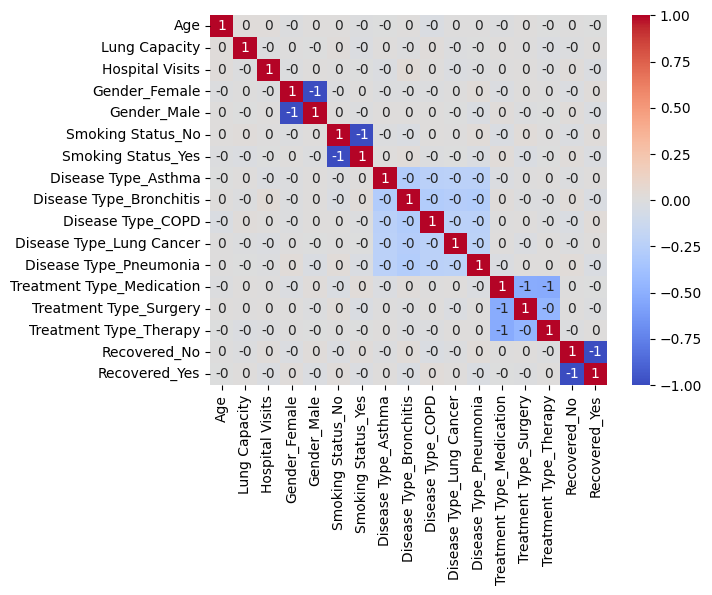

In [118]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".0f")
plts.show()

In [119]:
cols_boolean = ['Gender_Female', 'Gender_Male', 'Smoking Status_No', 'Smoking Status_Yes',	
                'Disease Type_Asthma', 'Disease Type_Bronchitis', 'Disease Type_COPD',
                'Disease Type_Lung Cancer', 'Disease Type_Pneumonia', 'Treatment Type_Medication',	
                'Treatment Type_Surgery', 'Treatment Type_Therapy', 'Recovered_No', 'Recovered_Yes']
for col in cols_boolean:
    df[col] = df[col].apply(lambda x: 1 if x == True else 0)

df

,Age,Lung Capacity,Hospital Visits,Gender_Female,Gender_Male,Smoking Status_No,Smoking Status_Yes,Disease Type_Asthma,Disease Type_Bronchitis,Disease Type_COPD,Disease Type_Lung Cancer,Disease Type_Pneumonia,Treatment Type_Medication,Treatment Type_Surgery,Treatment Type_Therapy,Recovered_No,Recovered_Yes
0,71.0,4.49,14.0,1,0,1,0,0,0,1,0,0,0,0,1,0,1
1,34.0,3.48,7.0,1,0,0,1,0,1,0,0,0,0,1,0,1,0
2,80.0,1.95,4.0,0,1,0,1,0,0,1,0,0,1,0,0,0,1
3,40.0,3.48,1.0,1,0,0,1,0,1,0,0,0,1,0,0,1,0
4,43.0,4.60,8.0,0,1,0,1,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,40.0,1.43,1.0,0,1,1,0,0,0,0,1,0,1,0,0,0,1
5196,21.0,1.50,4.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5197,42.0,5.53,5.0,1,0,1,0,0,0,0,0,1,0,1,0,1,0
5198,82.0,3.68,9.0,0,1,1,0,0,1,0,0,0,1,0,0,1,0


In [120]:
# Passo 3: Codificação quântica (Amplitude Encoding)
raw_data = df.to_numpy()
raw_data

array([[71.  ,  4.49, 14.  , ...,  1.  ,  0.  ,  1.  ],
       [34.  ,  3.48,  7.  , ...,  0.  ,  1.  ,  0.  ],
       [80.  ,  1.95,  4.  , ...,  0.  ,  0.  ,  1.  ],
       ...,
       [42.  ,  5.53,  5.  , ...,  0.  ,  1.  ,  0.  ],
       [82.  ,  3.68,  9.  , ...,  0.  ,  1.  ,  0.  ],
       [45.  ,  3.79, 10.  , ...,  0.  ,  0.  ,  1.  ]])

In [121]:
raw_data = raw_data[:4096]
data_normalized = np.delete(raw_data, -1, 1)
data_normalized = data_normalized / np.linalg.norm(data_normalized, axis=1, keepdims=True)
data_normalized

array([[0.97885326, 0.06190213, 0.19301332, ..., 0.        , 0.01378667,
        0.        ],
       [0.97257633, 0.09954605, 0.2002363 , ..., 0.02860519, 0.        ,
        0.02860519],
       [0.9981456 , 0.0243298 , 0.04990728, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.95221033, 0.07644133, 0.29095316, ..., 0.        , 0.02645029,
        0.        ],
       [0.99248533, 0.0860154 , 0.07784199, ..., 0.        , 0.        ,
        0.        ],
       [0.98175567, 0.03560944, 0.18303919, ..., 0.        , 0.        ,
        0.01663993]])

In [136]:
data_point = data_normalized[0]

state = Statevector(data_point)
num_qubits = int(np.log2(data_normalized.shape[1]))

print(data_normalized.shape[1])
print(np.log2(data_normalized.shape[1]))


16
4.0


16


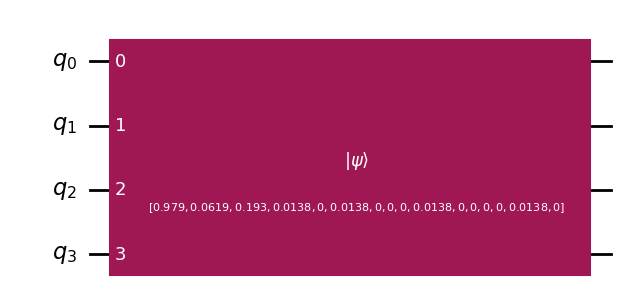

In [138]:
qc = QuantumCircuit(num_qubits)

print(len(state))

qc.initialize(state, range(num_qubits))

qc.draw('mpl')

## Execução dos dados em um hardware quântico

In [164]:
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit_machine_learning.optimizers import COBYLA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [163]:
# Passo 1: Preparação dos dados
y = data_normalized[:,-1]
X = data_normalized[:, :-2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Passo 2: Definição do modelo quântico
feature_map = TwoLocal(num_qubits=2, rotation_blocks=['ry', 'cz'], reps=2, entanglement='linear')
ansatz = TwoLocal(num_qubits=2, rotation_blocks=['ry', 'cz'], reps=3, entanglement='linear') 
vqc = VQC(feature_map=feature_map, ansatz=ansatz)

# Passo 3: Treinamento do modelo
vqc.fit(X_train, y_train)

# Passo 4: Execução do circuito quântico
predictions = vqc.predict(X_test)

# Passo 5: Avaliação do modelo
accuracy = accuracy_score(y_test, predictions)
print("Acurácia:", accuracy)

CircuitError: "name conflict adding parameter 'θ[0]'"